# Chapter 8: Wavelet Transforms and Multiresolution Image Analysis
This is the companion file for Chapter 8.

## Video 8.1
**A useful explanation of vector spaces**

[![A useful explanation of the video](https://img.youtube.com/vi/tMV61BZCrhk/0.jpg)](https://www.youtube.com/watch?v=tMV61BZCrhk)


## Video 8.2
**A nice introduction to wavelets**

[![A useful explanation of the video](https://img.youtube.com/vi/ZnmvUCtUAEE/0.jpg)](https://www.youtube.com/watch?v=ZnmvUCtUAEE)


## Video 8.3
**Basic concepts of wavelet transforms**

[![Basic Concepts of Wavelet Transforms](https://img.youtube.com/vi/QX1-xGVFqmw/0.jpg)](https://www.youtube.com/watch?v=QX1-xGVFqmw&t=16s)


## Video 8.4
**Discrete Wavelet Transform**

[![Discrete Wavelet Transform](https://img.youtube.com/vi/F7Lg-nFYooU/0.jpg)](https://www.youtube.com/watch?v=F7Lg-nFYooU)


## **Programming exercise 8.1:**

1.   Run the following code to see the output of applying Haar Wavelet Transform.

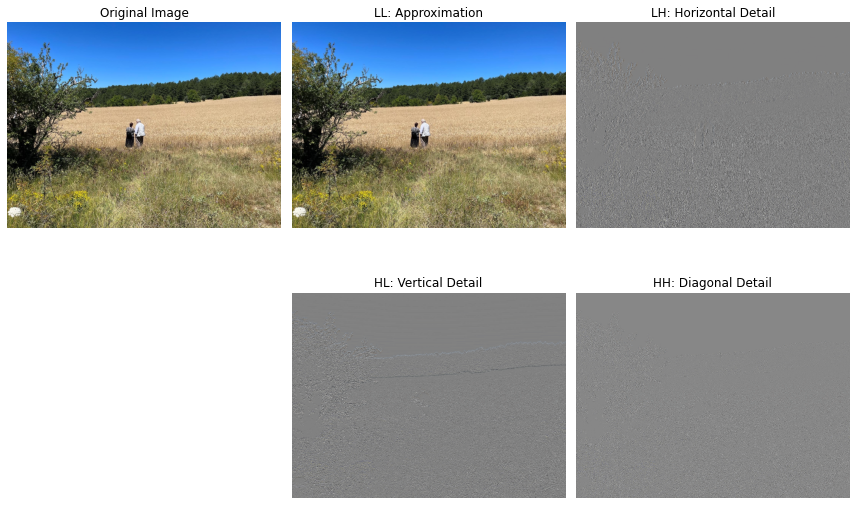

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

# Load the image
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/fatos_hocam_background.png"
original_img = np.array(Image.open(urllib.request.urlopen(url))) / 255

# Define 1D Haar transform
def haar_1d(x):
    N = len(x)
    output = np.zeros_like(x)
    for i in range(0, N, 2):
        output[i//2] = (x[i] + x[i+1]) / np.sqrt(2)      # Approximation
        output[N//2 + i//2] = (x[i] - x[i+1]) / np.sqrt(2)  # Detail
    return output

# 2D Haar transform (single level)
def haar_2d(channel):
    # Apply 1D Haar to rows
    temp = np.apply_along_axis(haar_1d, axis=1, arr=channel)
    # Apply 1D Haar to columns
    transformed = np.apply_along_axis(haar_1d, axis=0, arr=temp)
    
    h, w = transformed.shape
    h2, w2 = h // 2, w // 2
    LL = transformed[:h2, :w2]
    LH = transformed[:h2, w2:]
    HL = transformed[h2:, :w2]
    HH = transformed[h2:, w2:]
    
    return LL, LH, HL, HH

# Apply Haar transform to each RGB channel
LL_r, LH_r, HL_r, HH_r = haar_2d(original_img[:, :, 0])
LL_g, LH_g, HL_g, HH_g = haar_2d(original_img[:, :, 1])
LL_b, LH_b, HL_b, HH_b = haar_2d(original_img[:, :, 2])

# Stack components to make visual RGB versions of each
def stack_rgb(r, g, b):
    img = np.dstack((r, g, b))
    # Normalize for visualization
    img = img - img.min()
    img = img / img.max()
    return img

LL_img = stack_rgb(LL_r, LL_g, LL_b)
LH_img = stack_rgb(LH_r, LH_g, LH_b)
HL_img = stack_rgb(HL_r, HL_g, HL_b)
HH_img = stack_rgb(HH_r, HH_g, HH_b)

# Plot all components
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(LL_img)
plt.title('LL: Approximation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(LH_img)
plt.title('LH: Horizontal Detail')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(HL_img)
plt.title('HL: Vertical Detail')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(HH_img)
plt.title('HH: Diagonal Detail')
plt.axis('off')

plt.tight_layout()
plt.show()


## **Programming exercise 8.2:**

1.   Run the following code to see the output of the two-band analysis filter bank applied to a one-dimensional signal

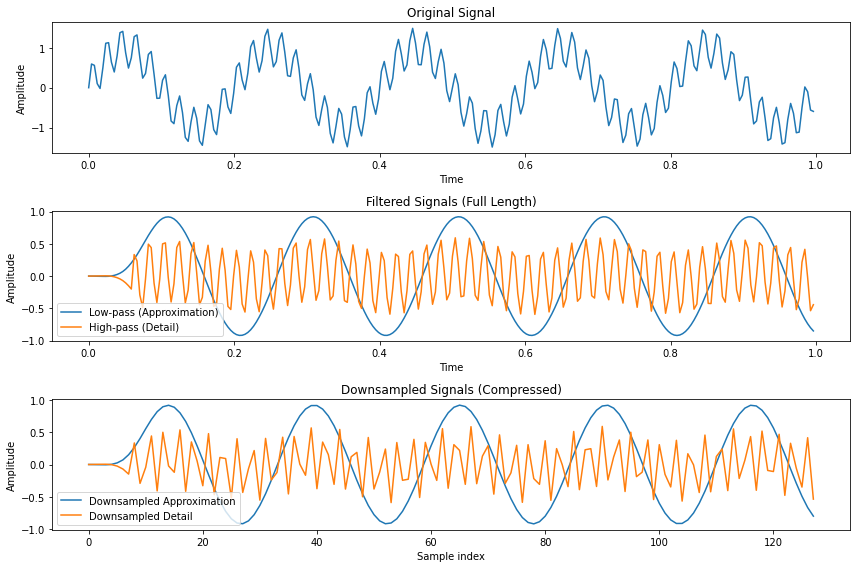

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

def two_band_analysis(fx, cutoff, filter_order=31):
    """
    Perform two-band analysis filter bank for 1D signal.

    Parameters:
    -----------
    fx : 1D numpy array
        Input signal.
    cutoff : float
        Normalized cutoff frequency (0 < cutoff < 0.5), relative to Nyquist.
    filter_order : int
        Order of FIR filters.

    Returns:
    --------
    f0_down : 1D array
        Approximation (low-pass) part, downsampled by 2.
    f1_down : 1D array
        Detail (high-pass) part, downsampled by 2.
    f0_full : 1D array
        Low-pass filtered signal (full length).
    f1_full : 1D array
        High-pass filtered signal (full length).
    """
    # Step 1: Design FIR low-pass and high-pass filters
    h0 = firwin(filter_order, cutoff, pass_zero='lowpass')   # Low-pass
    h1 = firwin(filter_order, cutoff, pass_zero='highpass')  # High-pass

    # Step 2: Filter the signal
    f0_full = lfilter(h0, [1.0], fx)  # Approximation
    f1_full = lfilter(h1, [1.0], fx)  # Detail

    # Step 3: Downsample by 2
    f0_down = f0_full[::2]
    f1_down = f1_full[::2]

    return f0_down, f1_down, f0_full, f1_full

# ---------------- Example Usage ----------------
# Create a sample 1D signal (e.g., sum of two sinusoids)
fs = 256  # Sampling frequency
t = np.arange(0, 1, 1/fs)
fx = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*50*t)

# Apply two-band analysis filter bank
cutoff = 0.1  # Normalized cutoff frequency (relative to Nyquist, 0.5)
f0_down, f1_down, f0_full, f1_full = two_band_analysis(fx, cutoff, filter_order=31)

# ---------------- Plot Results ----------------
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t, fx)
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
plt.plot(t, f0_full, label='Low-pass (Approximation)')
plt.plot(t, f1_full, label='High-pass (Detail)')
plt.title("Filtered Signals (Full Length)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3,1,3)
plt.plot(f0_down, label='Downsampled Approximation')
plt.plot(f1_down, label='Downsampled Detail')
plt.title("Downsampled Signals (Compressed)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


## **Programming exercise 8.3:**

1.   Run the following code to see the outputs of the two-band analysis filter bank applied to the image.

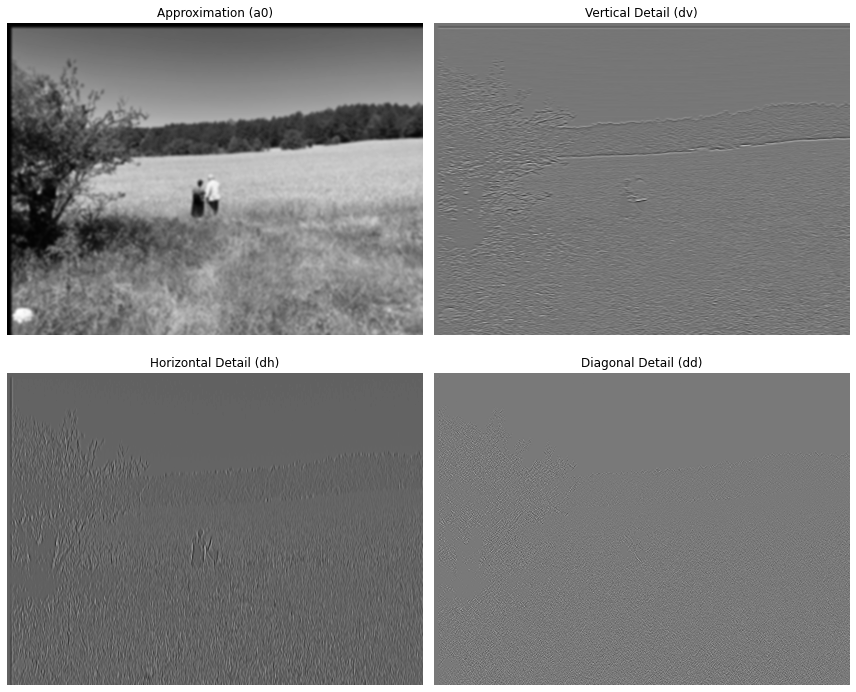

In [6]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from PIL import Image

def two_band_2d_analysis(image, cutoff=0.1, filter_order=31):
    """
    Two-band analysis filter bank for 2D images.

    Parameters
    ----------
    image : 2D numpy array
        Grayscale input image.
    cutoff : float
        Normalized cutoff frequency (0 < cutoff < 0.5).
    filter_order : int
        Order of 1D FIR filters.

    Returns
    -------
    a0 : 2D array
        Approximation (low-pass) image.
    dv : 2D array
        Vertical detail image.
    dh : 2D array
        Horizontal detail image.
    dd : 2D array
        Diagonal detail image.
    """
    # Step 1: Design 1D low-pass and high-pass filters
    h0 = firwin(filter_order, cutoff, pass_zero='lowpass')
    h1 = firwin(filter_order, cutoff, pass_zero='highpass')

    # Step 2: Filter rows
    f0_rows = lfilter(h0, [1.0], image, axis=1)  # Low-pass rows
    f1_rows = lfilter(h1, [1.0], image, axis=1)  # High-pass rows

    # Downsample rows by 2
    f0_rows_down = f0_rows[:, ::2]
    f1_rows_down = f1_rows[:, ::2]

    # Step 3 & 4: Filter columns and downsample by 2
    f0_cols = lfilter(h0, [1.0], f0_rows_down, axis=0)[::2, :]  # Low-pass columns of LP rows
    f1_cols = lfilter(h1, [1.0], f0_rows_down, axis=0)[::2, :]  # High-pass columns of LP rows

    f0_cols_h = lfilter(h0, [1.0], f1_rows_down, axis=0)[::2, :]  # Low-pass columns of HP rows
    f1_cols_h = lfilter(h1, [1.0], f1_rows_down, axis=0)[::2, :]  # High-pass columns of HP rows

    # Step 5: Merge with correct naming
    a0 = f0_cols       # Approximation
    dv = f1_cols       # Vertical detail (LP horizontal, HP vertical)
    dh = f0_cols_h     # Horizontal detail (HP horizontal, LP vertical)
    dd = f1_cols_h     # Diagonal detail (HP both directions)

    return a0, dv, dh, dd

# ---------------- Load the image ----------------
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/fatos_hocam_background.png"
original_img = np.array(Image.open(urllib.request.urlopen(url)).convert('L')) / 255.0  # Grayscale

# ---------------- Apply 2D two-band analysis filter bank ----------------
a0, dv, dh, dd = two_band_2d_analysis(original_img, cutoff=0.1, filter_order=31)

# ---------------- Plot the results ----------------
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.imshow(a0, cmap='gray')
plt.title("Approximation (a0)")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(dv, cmap='gray')
plt.title("Vertical Detail (dv)")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(dh, cmap='gray')
plt.title("Horizontal Detail (dh)")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(dd, cmap='gray')
plt.title("Diagonal Detail (dd)")
plt.axis('off')

plt.tight_layout()
plt.show()


## **Programming exercise 8.4:**

1.   Run the following code to see the reconstructed image obtained from the approximation and detail subbands using the two-band 2D synthesis filter bank.

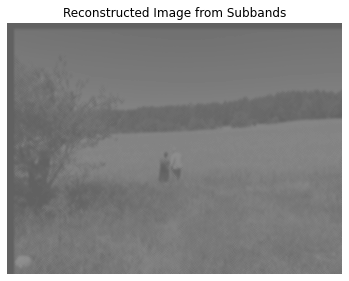

In [8]:
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt

def upsample_by_2(image):
    """
    Upsample a 2D image by a factor of 2 along both axes.
    """
    rows, cols = image.shape
    upsampled = np.zeros((rows*2, cols*2))
    upsampled[::2, ::2] = image
    return upsampled

def two_band_2d_synthesis(a0, dv, dh, dd, cutoff=0.1, filter_order=31):
    """
    Two-band synthesis filter bank for 2D images.

    Parameters
    ----------
    a0, dv, dh, dd : 2D arrays
        Subband images from analysis filter bank.
    cutoff : float
        Normalized cutoff frequency for synthesis filters.
    filter_order : int
        FIR filter order.

    Returns
    -------
    f_reconstructed : 2D array
        Reconstructed image from subbands.
    """
    # Step 1: Upsample all subband images by 2
    a0_up = upsample_by_2(a0)
    dv_up = upsample_by_2(dv)
    dh_up = upsample_by_2(dh)
    dd_up = upsample_by_2(dd)

    # Step 2: Design synthesis filters
    g0 = firwin(filter_order, cutoff, pass_zero='lowpass')
    g1 = firwin(filter_order, cutoff, pass_zero='highpass')

    # ---------------- Reconstruct columns ----------------
    # Vertical direction:
    # a0 + dh → low-pass vertically
    # dv + dd → high-pass vertically
    col_low = lfilter(g0, [1.0], a0_up, axis=0) + lfilter(g0, [1.0], dh_up, axis=0)
    col_high = lfilter(g1, [1.0], dv_up, axis=0) + lfilter(g1, [1.0], dd_up, axis=0)

    # ---------------- Reconstruct rows ----------------
    # Horizontal direction:
    f_reconstructed = lfilter(g0, [1.0], col_low, axis=1) + lfilter(g1, [1.0], col_high, axis=1)

    return f_reconstructed

# ---------------- Example Usage ----------------
# Reconstruct the image from the subbands obtained earlier
f_rec = two_band_2d_synthesis(a0, dv, dh, dd, cutoff=0.1, filter_order=31)

# ---------------- Plot ----------------
plt.figure(figsize=(6,6))
plt.imshow(f_rec, cmap='gray')
plt.title("Reconstructed Image from Subbands")
plt.axis('off')
plt.show()
